In [12]:
import pandas as pd
import matplotlib.pyplot as plt  # Asegúrate de importar esta librería al inicio
import seaborn as sns  # Importa seaborn para crear gráficos
from sklearn.model_selection import train_test_split  # Asegúrate de importar train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
data_balanced = pd.read_csv(r'C:\Users\pc-admin\Documents\Proyectos Data\Customer_Satisfaction\data_balanced.csv')
data_balanced

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,onboard_service,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,24,479,4,3,3,3,4,4,2,2,...,1,4,0,0,0,1,0,0,1,0
1,38,1984,1,4,5,4,4,2,3,1,...,1,4,2,0,0,1,0,0,0,0
2,35,2288,1,3,2,3,3,2,3,2,...,4,3,0,0,0,0,0,1,1,0
3,47,526,2,5,2,3,3,2,5,3,...,4,3,0,0,0,1,0,1,1,0
4,70,600,2,4,2,3,4,2,4,4,...,4,4,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,34,526,3,3,3,1,4,3,4,3,...,5,4,0,0,0,1,1,0,0,0
51851,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0,1,1,0,0,0,0
51852,17,828,2,5,1,5,2,1,2,4,...,4,2,0,0,0,0,0,1,1,0
51853,14,1127,3,3,3,3,4,4,4,3,...,5,4,0,0,1,1,0,0,0,0


In [3]:
# Generar la matriz de correlación
matriz_correlacion = data_balanced.corr()

# Convertir la matriz de correlación en un DataFrame para facilitar la manipulación
df_correlacion = pd.DataFrame(matriz_correlacion)

# Mostrar el DataFrame de la matriz de correlación
print("Matriz de Correlación en DataFrame:")
print(df_correlacion)

Matriz de Correlación en DataFrame:
                                        age  flight_distance  \
age                                1.000000         0.089384   
flight_distance                    0.089384         1.000000   
inflight_wifi_service              0.010576         0.004895   
departure_arrival_time_convenient  0.035858        -0.012611   
ease_of_online_booking             0.021888         0.066045   
gate_location                      0.003112         0.006940   
food_and_drink                     0.015158         0.050436   
online_boarding                    0.206418         0.207542   
seat_comfort                       0.150852         0.152319   
onboard_service                    0.049096         0.107219   
leg_room_service                   0.033697         0.129251   
baggage_handling                  -0.055888         0.060461   
checkin_service                    0.022388         0.068990   
inflight_service                  -0.062648         0.058894   
clea

In [4]:
# Ordenar las correlaciones de 'satisfaction' por valor absoluto de mayor a menor
correlacion_satisfaction = matriz_correlacion['satisfaction'].abs()

# Identificar las variables con correlación igual o menor que 0.1
variables_eliminadas = correlacion_satisfaction[correlacion_satisfaction <= 0.1].index.tolist()

# Eliminar esas variables de data_clean
data_balanced = data_balanced.drop(columns=variables_eliminadas)

# Filtrar y ordenar las correlaciones mayores que 0.1
correlacion_satisfaction_filtrada = correlacion_satisfaction[correlacion_satisfaction > 0.1].sort_values(ascending=False)

# Mostrar las variables eliminadas
print("Variables eliminadas por tener una correlación absoluta igual o menor que 0.1 con 'satisfaction':")
print(variables_eliminadas)

# Mostrar las correlaciones restantes de mayor a menor
print("\nCorrelación absoluta de las variables con 'satisfaction' mayores a 0.1, de mayor a menor:")
print(correlacion_satisfaction_filtrada)


Variables eliminadas por tener una correlación absoluta igual o menor que 0.1 con 'satisfaction':
['departure_arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'Gender_Male', 'customer_class_Eco Plus']

Correlación absoluta de las variables con 'satisfaction' mayores a 0.1, de mayor a menor:
satisfaction                       1.000000
online_boarding                    0.494224
type_of_travel_Personal Travel     0.449534
customer_class_Eco                 0.446170
seat_comfort                       0.333439
onboard_service                    0.315093
leg_room_service                   0.308751
cleanliness                        0.294310
inflight_wifi_service              0.286300
flight_distance                    0.284007
baggage_handling                   0.236495
inflight_service                   0.230654
checkin_service                    0.217699
food_and_drink                     0.193380
customer_type_disloyal Customer    0.185

Variables eliminadas por tener una correlación absoluta igual o menor que 0.1 con 'satisfaction':
[]

Correlación absoluta de las variables con 'satisfaction' mayores a 0.1, de mayor a menor:
online_boarding                    0.494224
type_of_travel_Personal Travel     0.449534
customer_class_Eco                 0.446170
seat_comfort                       0.333439
onboard_service                    0.315093
leg_room_service                   0.308751
cleanliness                        0.294310
inflight_wifi_service              0.286300
flight_distance                    0.284007
baggage_handling                   0.236495
inflight_service                   0.230654
checkin_service                    0.217699
food_and_drink                     0.193380
customer_type_disloyal Customer    0.185970
ease_of_online_booking             0.174403
age                                0.122487
Name: satisfaction, dtype: float64


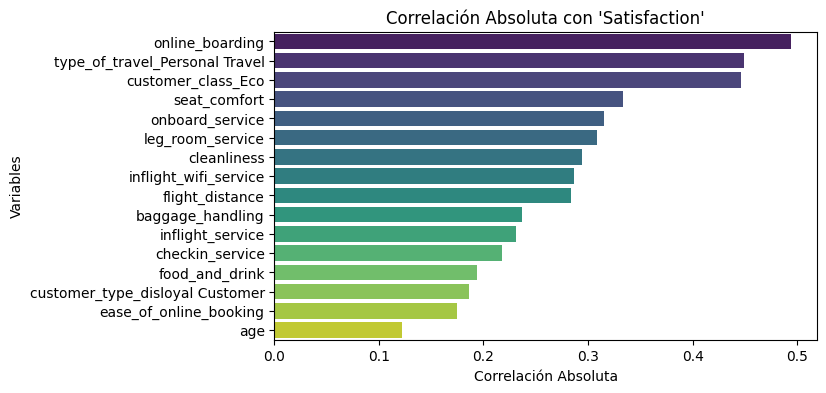

In [5]:
# Ordenar las correlaciones de 'satisfaction' por valor absoluto de mayor a menor, excluyendo la propia columna 'satisfaction'
correlacion_satisfaction = matriz_correlacion['satisfaction'].abs().drop('satisfaction')

# Identificar las variables con correlación igual o menor que 0.1
variables_eliminadas = correlacion_satisfaction[correlacion_satisfaction <= 0.1].index.tolist()

# Filtrar solo las variables que aún existen en data_balanced
variables_a_eliminar = [var for var in variables_eliminadas if var in data_balanced.columns]

# Eliminar esas variables de data_clean
data_balanced = data_balanced.drop(columns=variables_a_eliminar)

# Filtrar y ordenar las correlaciones mayores que 0.1
correlacion_satisfaction_filtrada = correlacion_satisfaction[correlacion_satisfaction > 0.1].sort_values(ascending=False)

# Mostrar las variables eliminadas
print("Variables eliminadas por tener una correlación absoluta igual o menor que 0.1 con 'satisfaction':")
print(variables_a_eliminar)

# Mostrar las correlaciones restantes de mayor a menor
print("\nCorrelación absoluta de las variables con 'satisfaction' mayores a 0.1, de mayor a menor:")
print(correlacion_satisfaction_filtrada)

# Crear un gráfico de barras ordenado de mayor a menor
plt.figure(figsize=(7, 4))
sns.barplot(x=correlacion_satisfaction_filtrada.values, y=correlacion_satisfaction_filtrada.index, palette="viridis", hue=correlacion_satisfaction_filtrada.index, dodge=False)

# Título y etiquetas
plt.title("Correlación Absoluta con 'Satisfaction'")
plt.xlabel("Correlación Absoluta")
plt.ylabel("Variables")

# Eliminar la leyenda
plt.legend([],[], frameon=False)

# Mostrar el gráfico
plt.show()

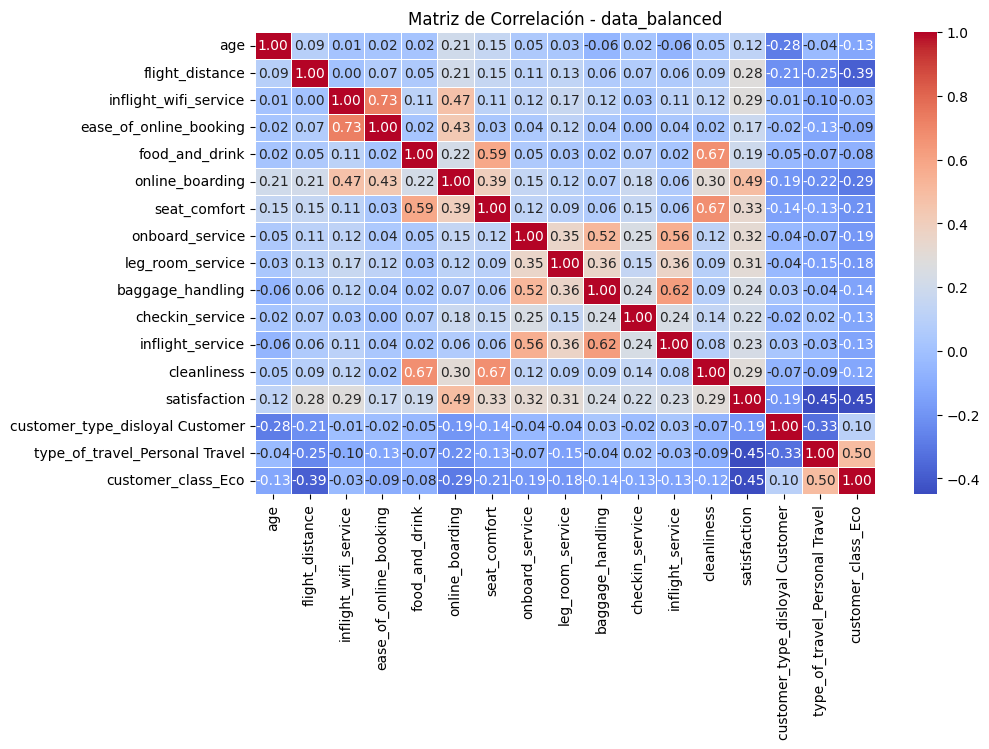

In [6]:
# Calcular la matriz de correlación sobre data_clean
correlation_matrix = data_balanced.corr()

# Crear un gráfico de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - data_balanced")
plt.show()

In [7]:
# Crear una máscara para identificar las correlaciones mayores a 0.6, excluyendo la diagonal y la variable 'satisfaction'
correlacion_matrix = data_balanced.corr().abs()
mask = (correlacion_matrix > 0.6) & (correlacion_matrix < 1.0)

# Crear un DataFrame con los pares de variables que cumplen la condición
high_correlation_pairs = correlacion_matrix[mask].stack().reset_index()
high_correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlacion']

print("Pares de variables con alta correlación (mayor a 0.6):")
print(high_correlation_pairs)

Pares de variables con alta correlación (mayor a 0.6):
                Variable1               Variable2  Correlacion
0   inflight_wifi_service  ease_of_online_booking     0.725719
1  ease_of_online_booking   inflight_wifi_service     0.725719
2          food_and_drink             cleanliness     0.674302
3            seat_comfort             cleanliness     0.673950
4        baggage_handling        inflight_service     0.624436
5        inflight_service        baggage_handling     0.624436
6             cleanliness          food_and_drink     0.674302
7             cleanliness            seat_comfort     0.673950


In [8]:
# Filtrar pares de variables con alta correlación
correlacion_matrix = data_balanced.corr().abs()
mask = (correlacion_matrix > 0.6) & (correlacion_matrix < 1.0)

# Crear un DataFrame con los pares de variables que cumplen la condición
high_correlation_pairs = correlacion_matrix[mask].stack().reset_index()
high_correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlacion']

# Lista para almacenar las variables eliminadas
variables_eliminadas = []

# Iterar sobre los pares de alta correlación
for index, row in high_correlation_pairs.iterrows():
    var1 = row['Variable1']
    var2 = row['Variable2']

    # Verificar que ambas variables aún estén en el DataFrame
    if var1 in data_balanced.columns and var2 in data_balanced.columns:
        # Calcular la correlación de cada variable con 'satisfaction'
        corr_var1 = abs(data_balanced[var1].corr(data_balanced['satisfaction']))
        corr_var2 = abs(data_balanced[var2].corr(data_balanced['satisfaction']))

        # Comparar y eliminar la variable con menor correlación con 'satisfaction'
        if corr_var1 < corr_var2:
            data_balanced = data_balanced.drop(columns=[var1])
            variables_eliminadas.append(var1)
            print(f"Se eliminó '{var1}' de data_clean debido a colinealidad con '{var2}'")
        else:
            data_balanced = data_balanced.drop(columns=[var2])
            variables_eliminadas.append(var2)
            print(f"Se eliminó '{var2}' de data_clean debido a colinealida con '{var1}'")

# Mostrar las variables eliminadas
if variables_eliminadas:
    print("\nVariables eliminadas debido a colinealida:")
    print(variables_eliminadas)
else:
    print("\nNo se eliminaron variables.")

Se eliminó 'ease_of_online_booking' de data_clean debido a colinealida con 'inflight_wifi_service'
Se eliminó 'food_and_drink' de data_clean debido a colinealidad con 'cleanliness'
Se eliminó 'cleanliness' de data_clean debido a colinealida con 'seat_comfort'
Se eliminó 'inflight_service' de data_clean debido a colinealida con 'baggage_handling'

Variables eliminadas debido a colinealida:
['ease_of_online_booking', 'food_and_drink', 'cleanliness', 'inflight_service']


In [9]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np

# Separar características y la variable objetivo de data_balanced
X = data_balanced.drop(columns=['satisfaction'])
y = data_balanced['satisfaction']

# Continuar con el proceso de validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo 1: Logistic Regression con escalado
pipeline_escalado = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
scores_logistic = cross_val_score(pipeline_escalado, X, y, cv=skf, scoring='accuracy')
print(f"Logistic Regression - Accuracy promedio en la validación cruzada: {scores_logistic.mean():.4f} (+/- {scores_logistic.std():.4f})")

# Modelo 2: Random Forest sin escalado
random_forest = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(random_forest, X, y, cv=skf, scoring='accuracy')
print(f"Random Forest - Accuracy promedio en la validación cruzada: {scores_rf.mean():.4f} (+/- {scores_rf.std():.4f})")

# Modelo 3: Gradient Boosting sin escalado
gradient_boosting = GradientBoostingClassifier(random_state=42)
scores_gb = cross_val_score(gradient_boosting, X, y, cv=skf, scoring='accuracy')
print(f"Gradient Boosting - Accuracy promedio en la validación cruzada: {scores_gb.mean():.4f} (+/- {scores_gb.std():.4f})")

# Modelo 4: XGBoost sin escalado
xgboost = XGBClassifier(random_state=42)
scores_xgb = cross_val_score(xgboost, X, y, cv=skf, scoring='accuracy')
print(f"XGBoost - Accuracy promedio en la validación cruzada: {scores_xgb.mean():.4f} (+/- {scores_xgb.std():.4f})")

Logistic Regression - Accuracy promedio en la validación cruzada: 0.8679 (+/- 0.0016)
Random Forest - Accuracy promedio en la validación cruzada: 0.9518 (+/- 0.0013)
Gradient Boosting - Accuracy promedio en la validación cruzada: 0.9354 (+/- 0.0016)
XGBoost - Accuracy promedio en la validación cruzada: 0.9512 (+/- 0.0021)



Modelo 2: Random Forest
Accuracy: 0.9522
ROC-AUC: 0.9485
Precision: 0.9609
Recall: 0.9247
F1-Score: 0.9425


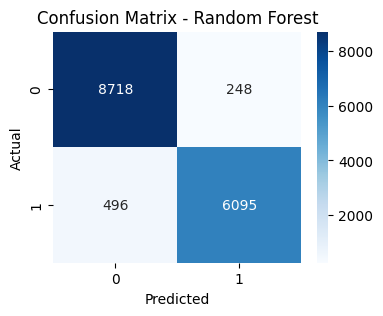


Modelo 3: Gradient Boosting
Accuracy: 0.9355
ROC-AUC: 0.9312
Precision: 0.9422
Recall: 0.9032
F1-Score: 0.9223


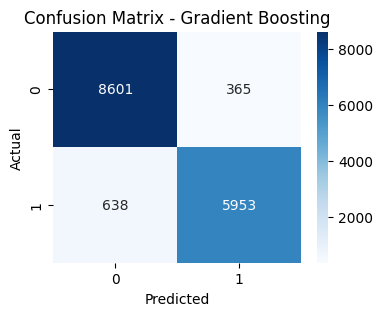


Modelo 4: XGBoost
Accuracy: 0.9508
ROC-AUC: 0.9474
Precision: 0.9577
Recall: 0.9247
F1-Score: 0.9409


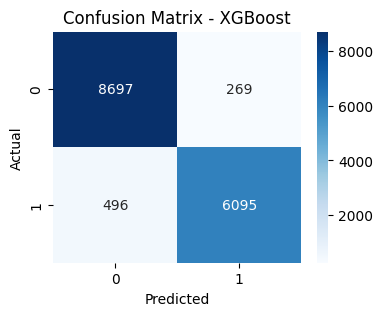

In [10]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: Random Forest sin escalado
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nModelo 2: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Visualización de la matriz de confusión ajustada
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modelo 2: Gradient Boosting sin escalado
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print(f"\nModelo 3: Gradient Boosting")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")

# Visualización de la matriz de confusión ajustada
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Modelo 3: XGBoost sin escalado
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_xgb = xgboost.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"\nModelo 4: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

# Visualización de la matriz de confusión ajustada
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


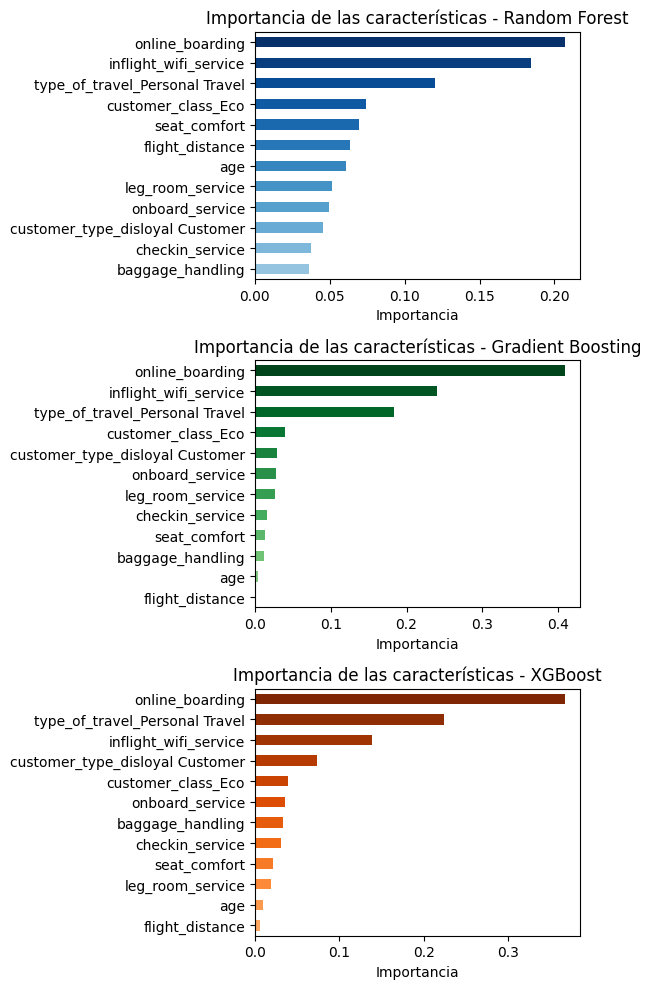

In [11]:
# Modelo 1: Random Forest sin escalado
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Modelo 2: Gradient Boosting sin escalado
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Modelo 3: XGBoost sin escalado
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

# Importancia de las características para Random Forest
importances_rf = random_forest.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=True)

# Importancia de las características para Gradient Boosting
importances_gb = gradient_boosting.feature_importances_
feature_importance_gb = pd.Series(importances_gb, index=X.columns).sort_values(ascending=True)

# Importancia de las características para XGBoost
importances_xgb = xgboost.feature_importances_
feature_importance_xgb = pd.Series(importances_xgb, index=X.columns).sort_values(ascending=True)

# Visualización de la importancia de las características
plt.figure(figsize=(6, 10))  # Aumentamos la altura de la figura para más espacio vertical

# Random Forest
plt.subplot(3, 1, 1)
feature_importance_rf.plot(kind='barh', color=plt.cm.Blues(np.linspace(0.4, 1, len(feature_importance_rf))))
plt.title('Importancia de las características - Random Forest')
plt.xlabel('Importancia')

# Gradient Boosting
plt.subplot(3, 1, 2)
feature_importance_gb.plot(kind='barh', color=plt.cm.Greens(np.linspace(0.4, 1, len(feature_importance_gb))))
plt.title('Importancia de las características - Gradient Boosting')
plt.xlabel('Importancia')

# XGBoost
plt.subplot(3, 1, 3)
feature_importance_xgb.plot(kind='barh', color=plt.cm.Oranges(np.linspace(0.4, 1, len(feature_importance_xgb))))
plt.title('Importancia de las características - XGBoost')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

